# Notebook for section 3.2
### TODO:
1. constractive loss
2. lr scheduling

In [1]:
%matplotlib inline
import src.lfw_dataset as lfw
from src.lfw_dataset import LFWDataLoader
from src.siamese import Siamese

# load the paths of the data sets
same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, same_test_paths, diff_test_paths = lfw.load_data()

def try_train(siamese_net, epochs=400, epoch_shuffle=True, verbose=0):
    """
    Try to train the siamese_net model. If success, return train history. Otherwise, return None.
    """
    try:
        print("Training...")
        history = s_net.train(same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, epochs=epochs, epoch_shuffle=epoch_shuffle, verbose=verbose)
        print("Training End")
        return history
    except Exception as e:
        print(f"Got exception while training: {type(e).__name__}")
        return None

Using TensorFlow backend.


Data already exist


## Hani Model (without modifications)

Instructions for updating:
Colocations handled automatically by placer.
Hani Model:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 40)           73099       input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)        

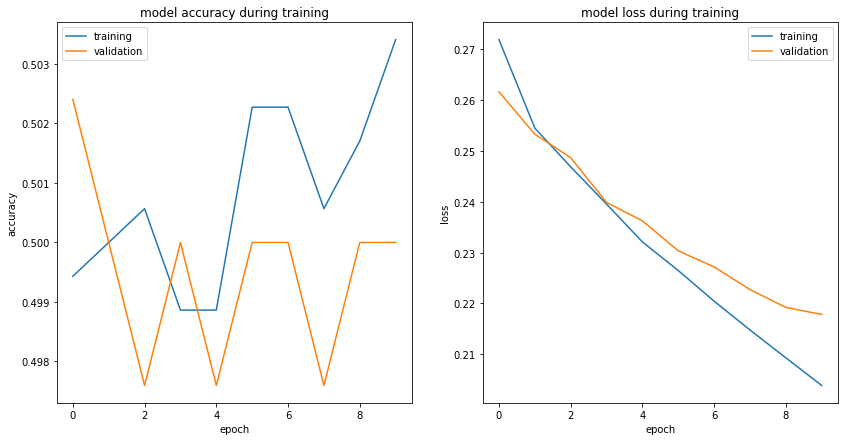

In [2]:
s_net = Siamese()
s_net.build('hani')
print("Hani Model:")
s_net.model.summary()

history = try_train(s_net, epochs=10, verbose=1)
if history:
    s_net.evaluate(history, same_test_paths, diff_test_paths)

## Apply ReLU as activation function

In [1]:
s_net = Siamese()
s_net.build('hani', act='relu')
print("Hani Model with ReLU:")
s_net.model.summary()

history = try_train(s_net)
if history:
    s_net.evaluate(history, same_test_paths, diff_test_paths)

NameError: name 'Siamese' is not defined

## Apply dropout before the last convolution

In [ ]:
s_net = Siamese()
s_net.build('hani', dropout='0.5')
print("Hani Model with dropout=0.5:")
s_net.model.summary()

history = try_train(s_net)
if history:
    s_net.evaluate(history, same_test_paths, diff_test_paths)

## Apply batch normalization between convolutions

In [ ]:
s_net = Siamese()
s_net.build('hani', batchnorm=True)
print("Hani Model with batch normalizationד:")
s_net.model.summary()

history = try_train(s_net)
if history:
    s_net.evaluate(history, same_test_paths, diff_test_paths)